In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## planning

In [2]:
from pydataset import data

x: potentially: petal length, petal width, sepal length, sepal width
y: species(which makes this supervised)

## acquisition

In [3]:
iris = data('iris')

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## preparation

In [5]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


lets clean up those column names

In [6]:
#i could use:
#iris.rename(columns = {'blah': 'real_blah'})
#or
iris.columns = [col.lower().replace('.','_') for col in iris.columns]

In [7]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## exploration

In [8]:
train_val, test = train_test_split(iris,train_size=0.8,random_state=1349,stratify=iris['species'])
train, validate = train_test_split(train_val,train_size=0.7,random_state=1349,stratify=train_val['species'])

In [9]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

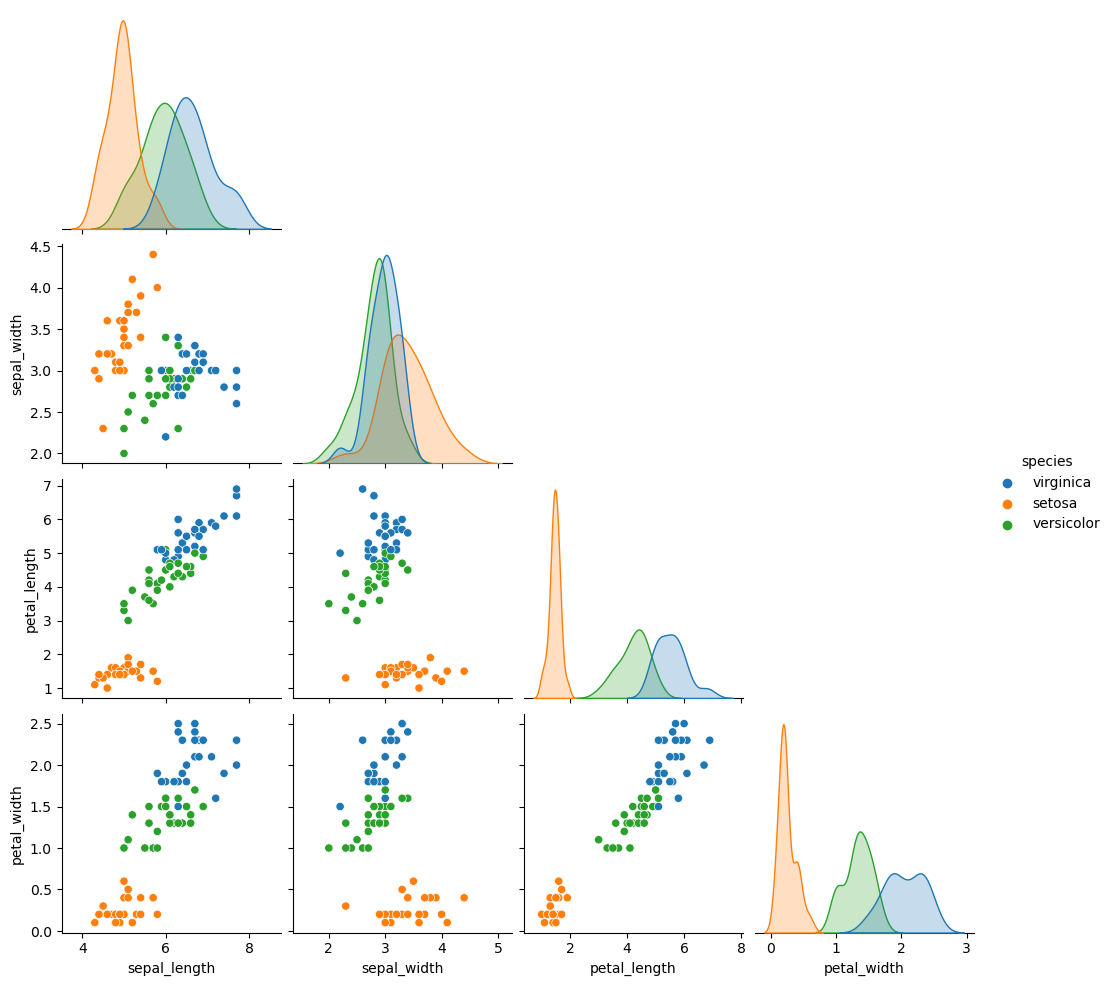

In [14]:
sns.pairplot(train,hue='species',corner = True)
plt.show()

In [ ]:
#looks like order of importance is: pedal width, petal length, sepal length, sepal width

## modeling

In [20]:
X_cols = train.columns.to_list()
Y_cols = 'species'

In [21]:
#drop species out of x_cols:
#because it's a list, we have to use remove
X_cols.remove('species')

In [22]:
X_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [23]:
train[X_cols]

,sepal_length,sepal_width,petal_length,petal_width
139,6.0,3.0,4.8,1.8
8,5.0,3.4,1.5,0.2
80,5.7,2.6,3.5,1.0
75,6.4,2.9,4.3,1.3
98,6.2,2.9,4.3,1.3
95,5.6,2.7,4.2,1.3
84,6.0,2.7,5.1,1.6
14,4.3,3.0,1.1,0.1
86,6.0,3.4,4.5,1.6
43,4.4,3.2,1.3,0.2


In [25]:
train[Y_cols]

139     virginica
8          setosa
80     versicolor
75     versicolor
98     versicolor
95     versicolor
84     versicolor
14         setosa
86     versicolor
43         setosa
17         setosa
26         setosa
104     virginica
23         setosa
136     virginica
144     virginica
68     versicolor
103     virginica
67     versicolor
62     versicolor
45         setosa
82     versicolor
30         setosa
120     virginica
94     versicolor
44         setosa
131     virginica
10         setosa
130     virginica
38         setosa
76     versicolor
124     virginica
31         setosa
27         setosa
102     virginica
50         setosa
101     virginica
72     versicolor
89     versicolor
125     virginica
61     versicolor
121     virginica
88     versicolor
15         setosa
141     virginica
145     virginica
49         setosa
150     virginica
127     virginica
146     virginica
57     versicolor
35         setosa
22         setosa
5          setosa
116     virginica
83     ver

In [ ]:
#make the thing
clf = DecisionTreeClassifier()

In [27]:
#what is the thing?
clf

DecisionTreeClassifier()

In [29]:
#fit the thing
#note that I'm not assigning clf.fit into anything
#clf.fit changes the object it'self
#which means it's ready to use
clf.fit(train[X_cols],train[Y_cols])

DecisionTreeClassifier()

In [31]:
#use the thing
model_1_preds = clf.predict(train[X_cols])

In [32]:
#lets make a second model before we start talking about scores
clf1 = DecisionTreeClassifier(max_depth=2)

In [33]:
clf1.fit(train[X_cols],train[Y_cols])

DecisionTreeClassifier(max_depth=2)

In [35]:
model_2_preds = clf1.predict(train[X_cols])

In [36]:
#accuracy score
clf1.score(train[X_cols],train[Y_cols])

0.9642857142857143

In [39]:
clf2 = DecisionTreeClassifier(max_depth=1)
#.fit calls take in x and a y as the labels
#that are there to train the model
clf2.fit(train[X_cols],train[Y_cols])
#predict will just take in the domain
model_3_preds = clf2.predict(train[X_cols])

In [38]:
clf2.score(train[X_cols],train[Y_cols])

0.6666666666666666

In [41]:
#accuracy lil more like we saw before
accuracy_score(train[Y_cols],model_3_preds)

0.6666666666666666

In [42]:
export_text(model_1_preds)

TypeError: ['virginica' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'versicolor' 'setosa' 'setosa' 'setosa' 'virginica'
 'setosa' 'virginica' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'setosa' 'virginica' 'setosa' 'virginica' 'setosa' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'versicolor' 'setosa' 'setosa' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica'
 'virginica' 'setosa' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'versicolor' 'virginica' 'setosa' 'setosa' 'virginica' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'virginica' 'versicolor'] is not an estimator instance.

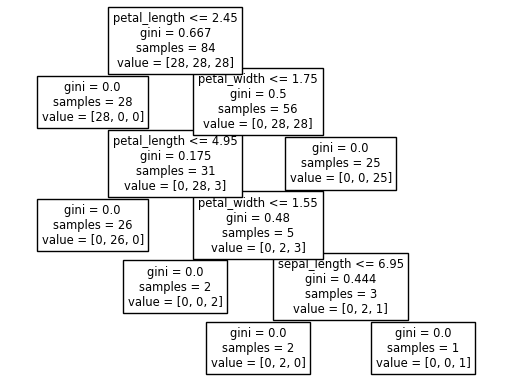

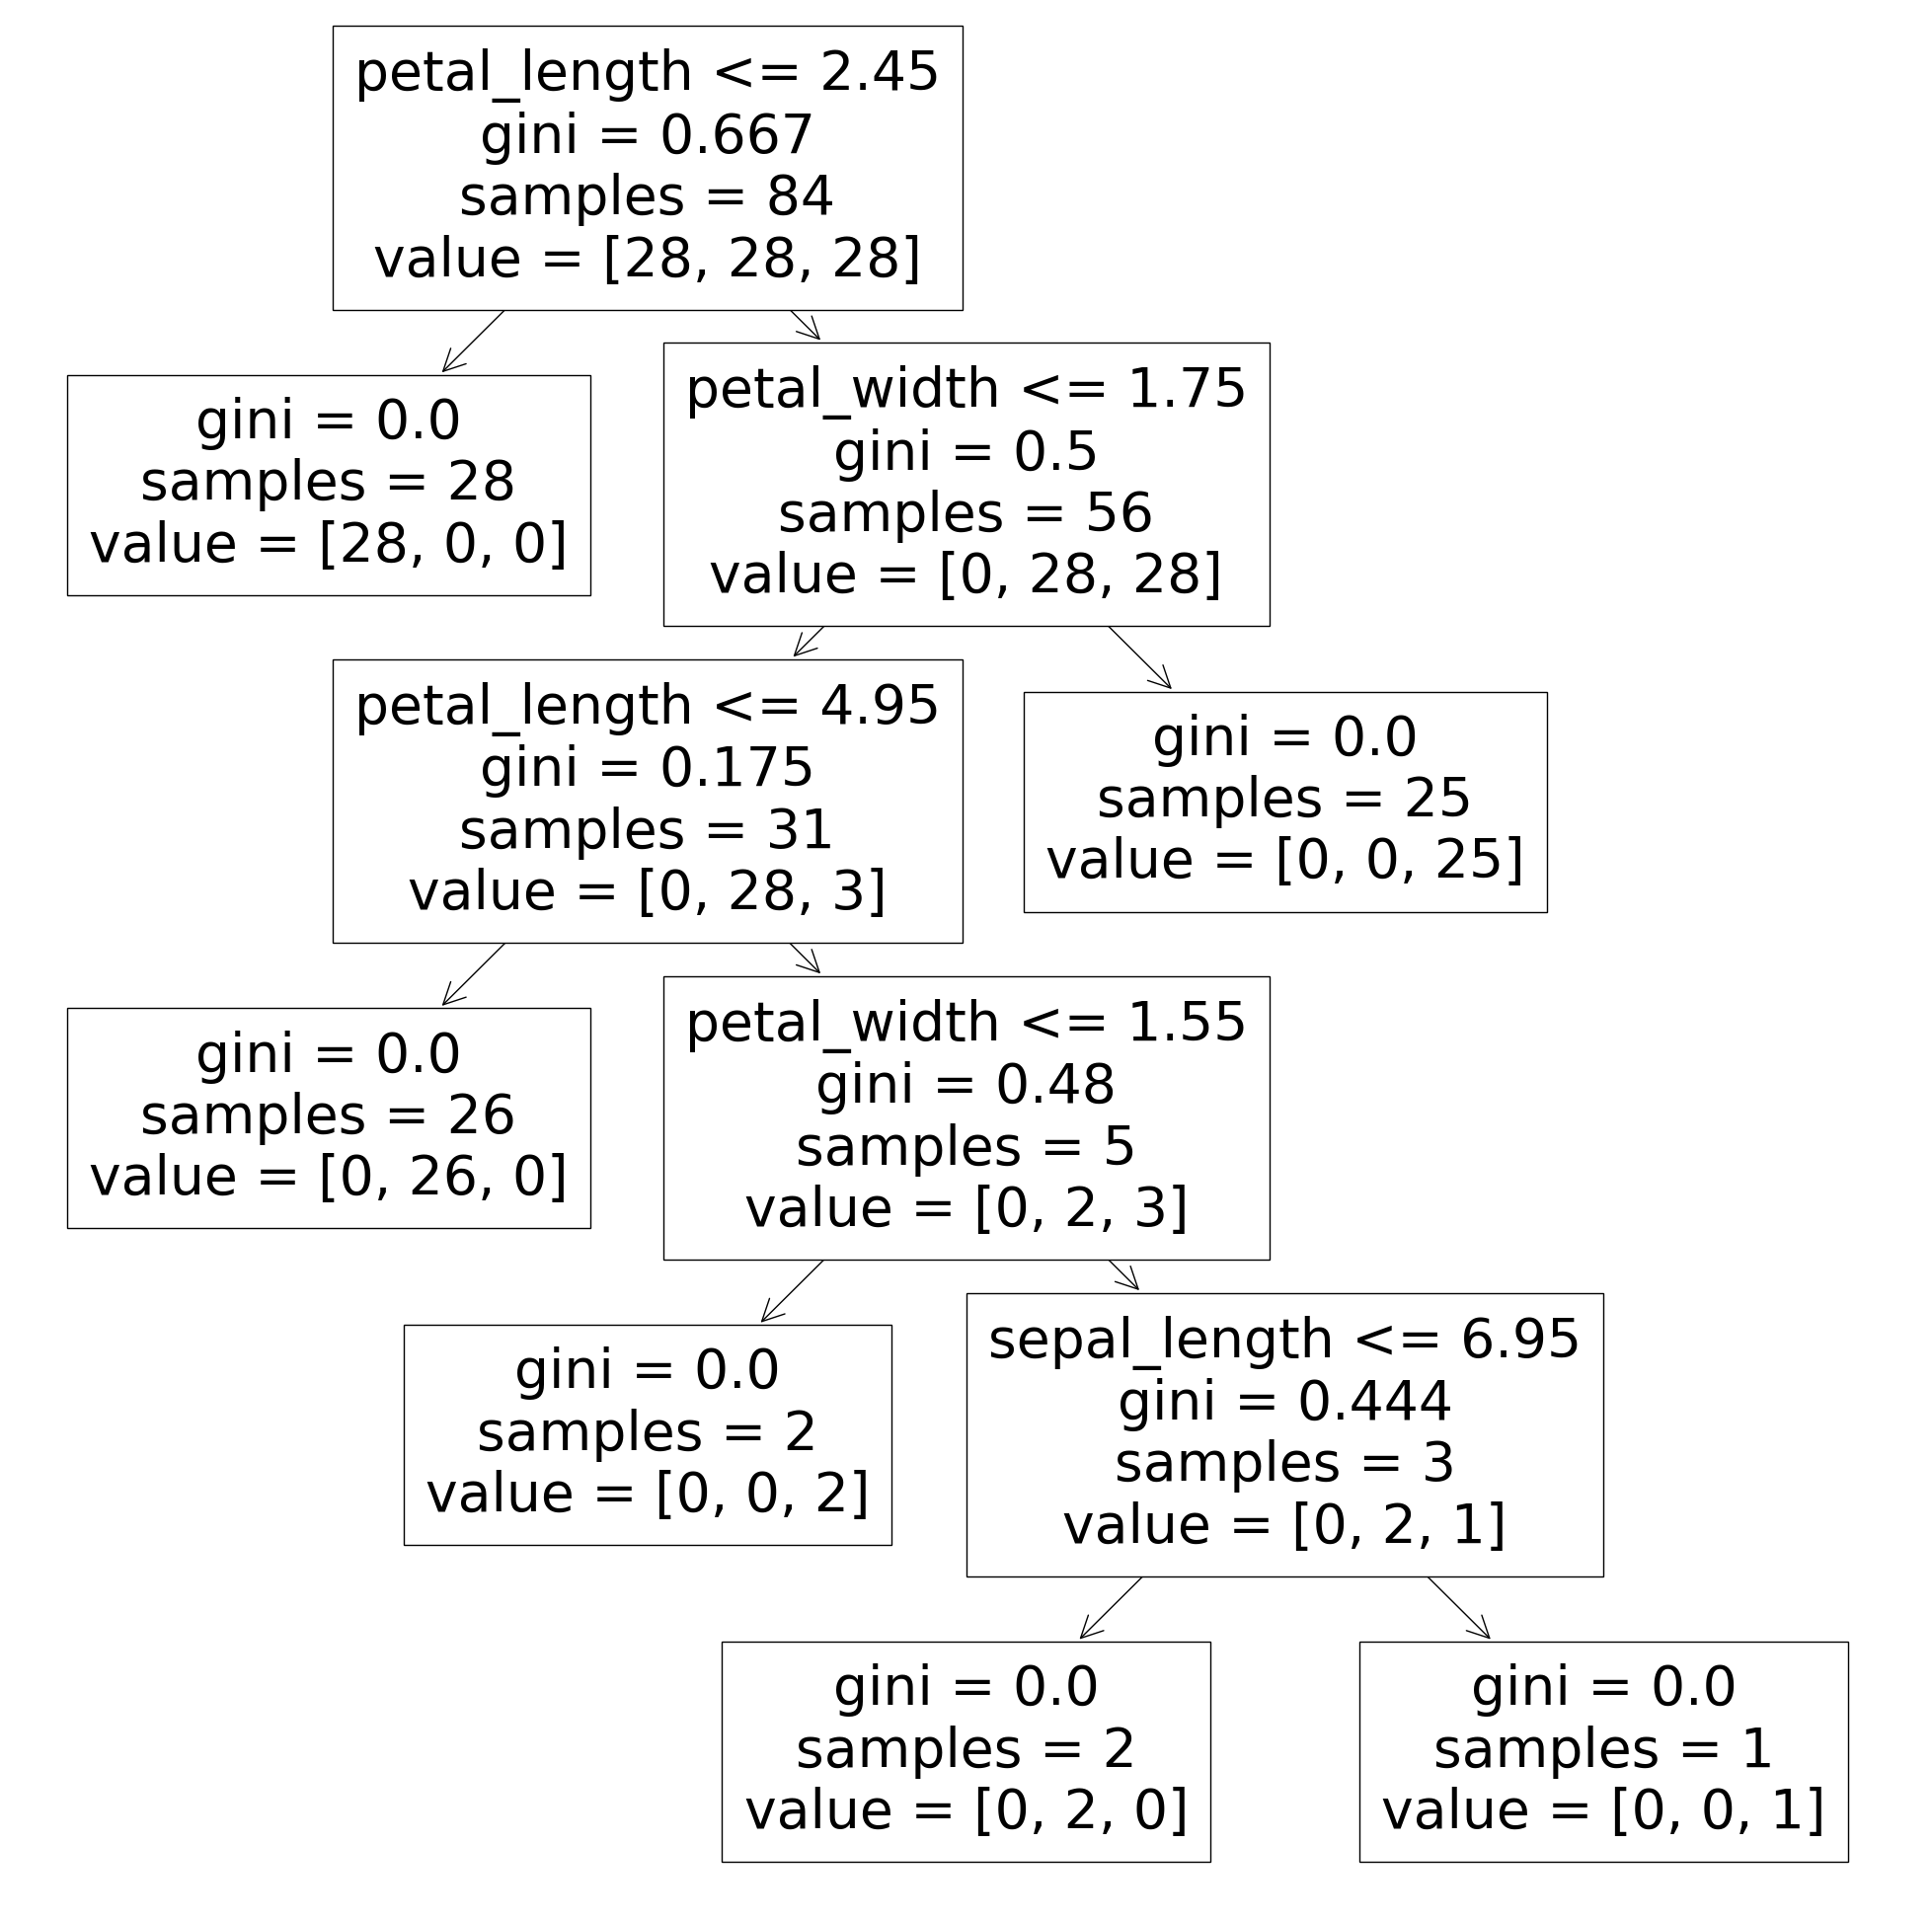

In [44]:
plt.figure(figsize=(25,25))
plot_tree(clf,feature_names=X_cols)
plt.show()

In [46]:
print(classification_report(train[Y_cols],model_1_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       1.00      1.00      1.00        28
   virginica       1.00      1.00      1.00        28

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [47]:
print(classification_report(train[Y_cols],model_2_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.90      1.00      0.95        28
   virginica       1.00      0.89      0.94        28

    accuracy                           0.96        84
   macro avg       0.97      0.96      0.96        84
weighted avg       0.97      0.96      0.96        84



In [48]:
print(classification_report(train[Y_cols],model_3_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.50      1.00      0.67        28
   virginica       0.00      0.00      0.00        28

    accuracy                           0.67        84
   macro avg       0.50      0.67      0.56        84
weighted avg       0.50      0.67      0.56        84



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### lets train a random forest

In [49]:
X_train = train[X_cols]
y_train = train[Y_cols]

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
#make the thing
rf = RandomForestClassifier()
#fit the thing
rf.fit(X_train, y_train)
#use the thing
rf1_pred = rf.predict(X_train)

In [52]:
#make the thing
rf = RandomForestClassifier()
#fit the thing
#note: if we narrow down the fearture to fit:
rf.fit(X_train[['petal_length','petal_width']], y_train)
#use the thing
#we need to do it to the predict statement as well
rf1_pred = rf.predict(X_train[['petal_length','petal_width']])

model assessments and predicitons

In [53]:
#well what do these models on validate?

In [55]:
#narrow down independent and dependent features with
#my lists of features from before
X_val, y_val = validate[X_cols], validate[y_cols]

In [57]:
print(f'''Performance in accuracy of decision Tree 1 on training data:
Accuracy (train): {clf.score(X_train,y_train)}
Accuracy (validate): {clf.score(X_val,y_val)}''')

Performance in accuracy of decision Tree 1 on training data:
Accuracy (train): 1.0
Accuracy (validate): 0.9722222222222222


In [59]:
print(f'''Performance in accuracy of random forest on training data:
Accuracy (train): {rf.score(X_train[['petal_length','petal_width']],y_train)}
Accuracy (validate): {round(rf.score(X_val[['petal_length','petal_width']],y_val)},2''')

SyntaxError: f-string: closing parenthesis '}' does not match opening parenthesis '(' (16870512.py, line 3)

In [62]:
titanic = pd.read_csv('titanic_df.csv')